<h1 align="center">¿Cuánto es la probabilidad que la consulta para la elección de rector sea vinculante?</h1>
<div align="right">David A. Miranda, PhD<br>13 de marzo de 2025</div>

En este Jupyter Notebook se presenta un modelo simple para estimar la probabilidad de que la consulta para la elección de rector sea vinculante, es decir, la probabilidad de que se tenga una votación directa al superar el umbral del 20% contemplado en el Acuerdo 006 de 2025 del Consejo Superior de la Universidad Industrial de Santander.

Se supondrá que en el proceso de votación participan $P$ aspirantes y que cada uno de ellos tiene la posibilidad de obtener un cierto porcentaje $x_i$, donde $i$ representa cada participante. Se asume una distribución uniforme para modelar el porcentaje de votación obtenido por cada aspirante. En cada simulación, se generan aleatoriamente dichos porcentajes asegurando que sumen exactamente 100%, y luego se organizan de menor a mayor para determinar si la diferencia porcentual entre el aspirante con mayor votación y el siguiente supera el umbral del 20%. Este proceso se repite un gran número de veces (método de Monte Carlo), obteniendo así valores medios y la desviación estándar del porcentaje de casos simulados que cumplen con el criterio de superar dicho umbral.

Cabe aclarar que la simulación descrita es una aplicación simplificada del método de Monte Carlo, cuyo objetivo es obtener una estimación razonable y cercana a la realidad, dadas las suposiciones realizadas.

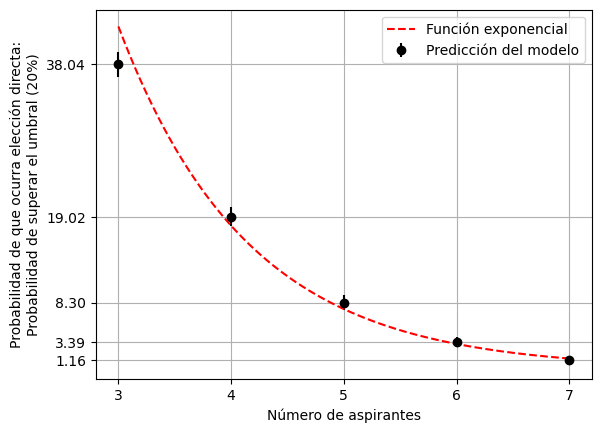

In [1]:
import numpy as np
import matplotlib.pyplot as plt

U = 0.2
N = 1000
p = [3, 4, 5, 6, 7]
yy = []
for _ in range(100):
    y = []
    for P in p:
        x = [np.random.random(P) for i in range(N)]
        x_norm = [np.sort(x[i] / sum(x[i])) for i in range(len(x))]
        umbral = [1 if x_norm[i][-1] - x_norm[i][-2] >= U else 0 for i in range(len(x_norm))]
        y.append(100*sum(umbral) / len(umbral))
        #print(f'Porcentaje de {len(x)} votaciones, con {P} participantes, que superan el umbral de {U}: {y[-1]:0.1f}%')
    yy.append(y)
y = np.mean(yy, axis=0)
y_std = np.std(yy, axis=0)

params = np.polyfit(p, np.log(y), 1)
x_fit = np.linspace(min(p), max(p), 1000)
y_fit = np.exp(params[1]) * np.exp(params[0] * x_fit)

plt.errorbar(p, y, yerr=y_std, fmt='o', color='k', label='Predicción del modelo')
plt.plot(x_fit, y_fit, 'r--', label='Función exponencial')
plt.legend()
plt.xticks(p)
plt.yticks(y)
plt.grid()
plt.xlabel('Número de aspirantes')
_ = plt.ylabel(f'Probabilidad de que ocurra elección directa:\nProbabilidad de superar el umbral ({100*U:.0f}%)')

El resultado de simular el modelo propuesto muestra que la máxima probabilidad de votación directa se obtiene cuando se presentan solo tres (3) aspirantes, y que dicha probabilidad disminuye exponencialmente a medida que aumenta el número de aspirantes, como lo muestra el ajuste al comportamiento exponencial (línea roja).

Esto sugiere que la probabilidad de cumplir los requisitos para que la consulta sea vinculante decae exponencialmente con el número de participantes inscritos.

End!